In [1]:
# Pandas
import pandas as pd 

# Numpy
import numpy as np # linear algebra

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer



# cross_val_score
from sklearn.model_selection import cross_val_score


# Imputer
from sklearn.preprocessing import Imputer


# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

#from sklearn import impute
from sklearn import metrics
from scipy.stats import chisquare
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 as sklearn_chi2

# Import label encoder 
from sklearn import preprocessing


# Load and Review Data

In [2]:
data_frame = pd.read_csv('E:\(survey)Worksheet 2.csv')

In [3]:
data_frame.shape

(518, 18)

In [4]:
data_frame.head(4)

,gender,nationality,placeOfBirth,department,batch,semester,section,lastSemesterGradePoint,questionsAskInTheClassroom,questionsAskedInTheClassroom,goThroughCourseMaterials,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,parentsSatisfaction,educationStatusofParents,Class
0,M,Bangladesh,Dhaka,SWE,16,Summer,A,3.66,M,10,L,24,3,10,5,Yes,Above HSC,M
1,M,Bangladesh,Munshiganj,SWE,17,Summer,B,2.25,M,8,M,118,4,30,19,Yes,Above HSC,L
2,M,Bangladesh,Cumilla,SWE,17,Spring,A,3.25,M,5,M,12,2,4,2,Yes,HSC,L
3,F,Bangladesh,Dhaka,SWE,18,Summer,B,3.50,M,2,M,11,2,3,7,No,Above HSC,M


# Null Value Check

In [5]:
print (data_frame.isnull().values.any())

False


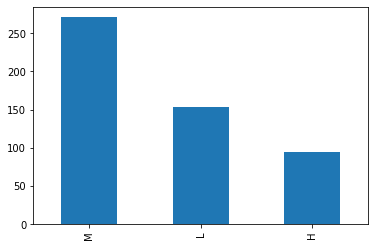

In [6]:
data_frame["Class"].value_counts().plot.bar()


# One hot encoding

In [7]:
# X and y
Without_class_data_frame = data_frame.drop(columns=['Class'])
Without_class_data_frame.head(4)

,gender,nationality,placeOfBirth,department,batch,semester,section,lastSemesterGradePoint,questionsAskInTheClassroom,questionsAskedInTheClassroom,goThroughCourseMaterials,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,parentsSatisfaction,educationStatusofParents
0,M,Bangladesh,Dhaka,SWE,16,Summer,A,3.66,M,10,L,24,3,10,5,Yes,Above HSC
1,M,Bangladesh,Munshiganj,SWE,17,Summer,B,2.25,M,8,M,118,4,30,19,Yes,Above HSC
2,M,Bangladesh,Cumilla,SWE,17,Spring,A,3.25,M,5,M,12,2,4,2,Yes,HSC
3,F,Bangladesh,Dhaka,SWE,18,Summer,B,3.50,M,2,M,11,2,3,7,No,Above HSC


In [8]:
# Get dummies
Without_class_data_frame = pd.get_dummies(Without_class_data_frame)

# data_frame head
Without_class_data_frame.head(2)

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,questionsAskInTheClassroom_M,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC
0,16,3.66,10,24,3,10,5,0,1,1,...,1,0,1,0,0,1,0,1,0,0
1,17,2.25,8,118,4,30,19,0,1,1,...,1,0,0,1,0,1,0,1,0,0


# Label Encoding

In [9]:

Class_data_frame = data_frame.drop(columns=['gender','batch','nationality',
                                            'department','semester',
                                            'section','lastSemesterGradePoint',
                                            'questionsAskInTheClassroom',
                                            'questionsAskedInTheClassroom ',
                                            'goThroughCourseMaterials',
                                            'goThroughCourseMaterial',
                                            'meetWithAcademicAdviser',
                                            'groupStudyHours',
                                            'studentAbsenceDays',
                                            'parentsSatisfaction','educationStatusofParents'])
Class_data_frame.head(3)

,placeOfBirth,Class
0,Dhaka,M
1,Munshiganj,L
2,Cumilla,L


In [10]:
Class_data_frame['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

In [11]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

# Encode labels in column 'Class'. 
Class_data_frame['Class']= label_encoder.fit_transform(Class_data_frame['Class']) 
  
Class_data_frame['Class'].unique() 


array([2, 1, 0], dtype=int64)

In [12]:
Class_data_frame = pd.DataFrame(Class_data_frame['Class'])
Class_data_frame.head(3)

,Class
0,2
1,1
2,1


In [13]:

final_data_frame = pd.concat([Without_class_data_frame, Class_data_frame], axis = 1)
final_data_frame.head(4)

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC,Class
0,16,3.66,10,24,3,10,5,0,1,1,...,0,1,0,0,1,0,1,0,0,2
1,17,2.25,8,118,4,30,19,0,1,1,...,0,0,1,0,1,0,1,0,0,1
2,17,3.25,5,12,2,4,2,0,1,1,...,0,0,1,0,1,0,0,1,0,1
3,18,3.50,2,11,2,3,7,1,0,1,...,0,0,1,1,0,0,1,0,0,2


# Co-relation Check

In [14]:
final_data_frame.corr()

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC,Class
batch,1.000000,0.054141,0.092020,0.052573,-0.106342,0.013168,-0.144744,-0.023370,0.023370,0.169137,...,-0.048073,-0.006264,0.041619,0.037203,-0.033395,-0.014521,-0.019456,-0.025609,0.056574,0.096536
lastSemesterGradePoint,0.054141,1.000000,0.151437,0.072438,0.000417,0.001058,-0.031197,-0.017614,0.017614,-0.001175,...,0.173663,-0.060540,-0.088292,-0.047669,0.044179,0.012495,0.042449,-0.068720,0.021865,-0.025954
questionsAskedInTheClassroom,0.092020,0.151437,1.000000,0.256593,0.113385,0.133798,-0.019366,-0.118999,0.118999,0.071379,...,0.109463,-0.143077,0.022630,-0.048155,0.033125,0.063243,0.033457,-0.068904,0.034425,-0.047580
goThroughCourseMaterial,0.052573,0.072438,0.256593,1.000000,0.085755,0.497176,0.022326,-0.091188,0.091188,0.052621,...,0.198691,-0.149327,-0.041279,-0.143110,0.150481,-0.041016,-0.021281,-0.044878,0.081551,-0.026018
meetWithAcademicAdviser,-0.106342,0.000417,0.113385,0.085755,1.000000,0.146560,0.044956,0.033776,-0.033776,-0.063530,...,0.063355,-0.077161,0.008883,-0.080952,0.074763,0.022373,-0.043028,0.045056,0.006527,-0.017504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
parentsSatisfaction_Yes,-0.014521,0.012495,0.063243,-0.041016,0.022373,-0.057690,0.032785,-0.018347,0.018347,-0.105306,...,0.025189,-0.034715,0.006544,-0.054797,-0.173226,1.000000,-0.011718,0.047809,-0.039667,0.007507
educationStatusofParents_Above HSC,-0.019456,0.042449,0.033457,-0.021281,-0.043028,-0.044659,0.035259,0.013646,-0.013646,0.105010,...,-0.038321,-0.044335,0.062530,0.018420,-0.015505,-0.011718,1.000000,-0.701025,-0.555301,-0.106974
educationStatusofParents_HSC,-0.025609,-0.068720,-0.068904,-0.044878,0.045056,-0.040046,0.003073,0.062824,-0.062824,-0.092514,...,0.022527,0.096883,-0.089600,0.045501,-0.055746,0.047809,-0.701025,1.000000,-0.203800,0.073519
educationStatusofParents_SSC,0.056574,0.021865,0.034425,0.081551,0.006527,0.108010,-0.051989,-0.091999,0.091999,-0.036273,...,0.026337,-0.052120,0.018648,-0.078349,0.086296,-0.039667,-0.555301,-0.203800,1.000000,0.061120


# Chi2

In [15]:
X = final_data_frame.iloc[:,:-1]
y = final_data_frame.iloc[:,-1:]   

dfcolumns =pd.DataFrame(final_data_frame.columns) 
#chi2
bestfeatures = SelectKBest(score_func=sklearn_chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Class','Chi2 Weights']
# print(featureScores.nlargest(len(data_frame.columns),'Score'))

# featureScores.plot(kind='bar', subplots=True, figsize=(20,20))
featureScores = featureScores.sort_values(by=['Chi2 Weights'], ascending=False)
display(featureScores)
display(featureScores.shape)

,Class,Chi2 Weights
3,goThroughCourseMaterial,72.046270
6,studentAbsenceDays,46.797132
0,batch,39.071508
2,questionsAskedInTheClassroom,36.148678
5,groupStudyHours,9.818743
...,...,...
131,section_D,0.059082
31,placeOfBirth_Cumilla,0.030538
69,placeOfBirth_Madaripur,0.029912
147,questionsAskInTheClassroom_L,0.013529


(159, 2)

# Random Forest

In [16]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
#print("Features sorted by their score:")
#featureScores2 = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_)), reverse=True)


dfscoresOfRF = pd.DataFrame(rf.feature_importances_)
dfscoresOfRF.columns = ['Random Forest Importance']
dfscoresOfRF = dfscoresOfRF.sort_values(by='Random Forest Importance', ascending=False)



#concat two dataframes for better visualization 
featureScores = pd.concat([featureScores, dfscoresOfRF],axis=1)

#featureScores = featureScores.sort_Values(by='Score', ascending = False)
display(featureScores)
display(featureScores.shape)

C:\Users\DCL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


,Class,Chi2 Weights,Random Forest Importance
0,batch,39.071508,0.062652
1,lastSemesterGradePoint,0.100282,0.132290
2,questionsAskedInTheClassroom,36.148678,0.059807
3,goThroughCourseMaterial,72.046270,0.080782
4,meetWithAcademicAdviser,0.356554,0.042780
...,...,...,...
154,parentsSatisfaction_Yes,0.219842,0.001052
155,educationStatusofParents_Above HSC,2.037117,0.010416
156,educationStatusofParents_HSC,2.252037,0.009069
157,educationStatusofParents_SSC,1.715610,0.007964


(159, 3)

# Training, Test Data Preparing considering top 10 features

In [17]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom ','batch', 'groupStudyHours',
                        'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 
                        'questionsAskInTheClassroom_H']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [18]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

1.93% in training set
1.93% in test set


# Decision Tree

In [33]:
accuracies = {}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train.T,y_train.T)

accu = clf.score(X_test.T,y_test.T)*100
accuracies['Decision Tree'] = accu

#Predict the response for test dataset
x_pred = clf.predict(X_train.T)

#Predict the response for test dataset
y_pred = clf.predict(X_test.T)

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.988950276243094


# Performance on Testing data

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.3974358974358974


# GaussianNB

In [37]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train.T, y_train.T.ravel())  # ravel() return 1-D array

accu = nb_model.score(X_test.T,y_test.T)*100
accuracies['Naive Bayes'] = accu

In [38]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train.T)

accuracy = metrics.accuracy_score(y_train.T, prediction_from_trained_data)

print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.5442


# Performance on Testing data

In [39]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test.T)

accuracy = metrics.accuracy_score(y_test.T, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f}".format(accuracy))

Accuracy of our GaussianNB model is: 0.5321


In [40]:
print ("Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))

print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test.T, prediction_from_test_data, labels=[1, 0])))
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test.T, prediction_from_test_data, labels=[1, 0])))

Accuracy of our GaussianNB model is: 0.5321 %
Confusion Matrix
[[4 1]
 [0 1]]
Classification Report
              precision    recall  f1-score   support

           1       0.57      0.09      0.15        45
           0       0.50      0.03      0.06        30

   micro avg       0.56      0.07      0.12        75
   macro avg       0.54      0.06      0.11        75
weighted avg       0.54      0.07      0.12        75



# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train.T, y_train.T.ravel())

accu = rf_model.score(X_test.T,y_test.T)*100
accuracies['Random Forest'] = accu

In [42]:
rf_predict_train = rf_model.predict(X_train.T)

rf_accuracy = metrics.accuracy_score(y_train.T, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9669


# Performance on Testing data

In [43]:
rf_predict_test = rf_model.predict(X_test.T)

rf_accuracy_testdata = metrics.accuracy_score(y_test.T, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.4487


In [44]:
print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test.T, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test.T, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[18  4]
 [ 9  5]]

Classification Report

              precision    recall  f1-score   support

           1       0.38      0.40      0.39        45
           0       0.22      0.17      0.19        30

   micro avg       0.33      0.31      0.32        75
   macro avg       0.30      0.28      0.29        75
weighted avg       0.32      0.31      0.31        75



# KNN

In [45]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train.T, y_train.T.ravel())

accu = knn.score(X_test.T,y_test.T)*100
accuracies['KNN'] = accu

# predict the train response
x_pred = knn.predict(X_train.T)

# predict the test response
y_pred = knn.predict(X_test.T)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.638121546961326


# Performance on Testing data

In [47]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.4166666666666667


In [48]:
knn_predict_test = knn.predict(X_test.T)
knn_accuracy_testdata = metrics.accuracy_score(y_test.T, knn_predict_test)
print ("Accuracy: {0:.4f}".format(knn_accuracy_testdata))
print ("Confusion Matrix for KNN Classifier")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test.T, knn_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test.T, knn_predict_test, labels=[1, 0])))

Accuracy: 0.4167
Confusion Matrix for KNN Classifier
[[15  7]
 [ 5  5]]

Classification Report

              precision    recall  f1-score   support

           1       0.35      0.33      0.34        45
           0       0.20      0.17      0.18        30

   micro avg       0.29      0.27      0.28        75
   macro avg       0.27      0.25      0.26        75
weighted avg       0.29      0.27      0.28        75



# Training, Test Data Preparing considering top 4 features

In [50]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom ','batch']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [51]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [52]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

0.77% in training set
0.77% in test set


# DT

In [53]:
accuracies = {}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train.T,y_train.T)

accu = clf.score(X_test.T,y_test.T)*100
accuracies['Decision Tree'] = accu

#Predict the response for test dataset
x_pred = clf.predict(X_train.T)

#Predict the response for test dataset
y_pred = clf.predict(X_test.T)

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.9779005524861878


# Performance on Testing data

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.41025641025641024


# GaussianNB

In [56]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train.T, y_train.T.ravel())  # ravel() return 1-D array

accu = nb_model.score(X_test.T,y_test.T)*100
accuracies['Naive Bayes'] = accu

In [57]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train.T)

accuracy = metrics.accuracy_score(y_train.T, prediction_from_trained_data)

print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.5331


# Performance on Testing data

In [58]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test.T)

accuracy = metrics.accuracy_score(y_test.T, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f}".format(accuracy))

Accuracy of our GaussianNB model is: 0.5321


# RM

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train.T, y_train.T.ravel())

accu = rf_model.score(X_test.T,y_test.T)*100
accuracies['Random Forest'] = accu

In [60]:
rf_predict_train = rf_model.predict(X_train.T)

rf_accuracy = metrics.accuracy_score(y_train.T, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9558


# Performance on Testing data

In [61]:
rf_predict_test = rf_model.predict(X_test.T)

rf_accuracy_testdata = metrics.accuracy_score(y_test.T, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.4487


# KNN

In [62]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train.T, y_train.T.ravel())

accu = knn.score(X_test.T,y_test.T)*100
accuracies['KNN'] = accu

# predict the train response
x_pred = knn.predict(X_train.T)

# predict the test response
y_pred = knn.predict(X_test.T)

In [63]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.6602209944751382


# Performance on Testing data

In [64]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.3782051282051282


# ANN

In [20]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom ','batch', 'groupStudyHours','department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [53]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

69.88% in training set
30.12% in test set


In [54]:
print(feature_column_names)

['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from tensorflow.keras.metrics import categorical_crossentropy

In [56]:
print(len(feature_column_names))
test_columns = len(feature_column_names)
print(test_columns)

10
10


In [57]:
acc =0
j= 0
test_columns = len(feature_column_names)
featureNo = 10

while j < test_columns:
    # Initialising the ANN
    # Initialising the ANN
  print(feature_column_names)
  classifier = Sequential()

# Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 70, kernel_initializer = 'uniform', activation = 'relu', input_dim = featureNo))

# Adding the second hidden layer
  classifier.add(Dense(units = 66, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
  classifier.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
  classifier.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
  classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
  classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier.compile(Adam(lr=.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
  classifier.fit(X_train, y_train, batch_size =42 , epochs = 2)
  
  

  # Predicting the Test set results
  predictions = classifier.predict(X_test)
  
  for p in predictions:
    print(p)

  accuracy = (predictions[0][0]+predictions[1][1])/(predictions[0][0]+predictions[0][1]+predictions[1][0]+predictions[1][1])
  acc = str(accuracy*100)
  print("Accuracy: "+ acc+"%")
    
  
  
    
  print(featureNo)
  print(feature_column_names)
  feature_column_names.pop()
  featureNo -= 1
  print(featureNo)
  X = final_data_frame[feature_column_names].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  j += 1
  

['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']
Train on 362 samples
Epoch 1/2
362/362 [==============================] - 4s 11ms/sample - loss: 1.0974 - accuracy: 0.5055
Epoch 2/2
362/362 [==============================] - 0s 201us/sample - loss: 1.0891 - accuracy: 0.5249
[0.47323608 0.48363477 0.52300316]
[0.44921514 0.46926302 0.54291135]
[0.47086793 0.48225513 0.52490276]
[0.44224945 0.46501678 0.54875237]
[0.44432765 0.4663357  0.54694754]
[0.47179526 0.4828348  0.524121  ]
[0.46097746 0.47630775 0.53315574]
[0.43774375 0.4623318  0.5524378 ]
[0.46400678 0.47816166 0.53059953]
[0.45587808 0.47330436 0.5373218 ]
[0.46373457 0.47798648 0.5308596 ]
[0.46863508 0.48087487 0.5268162 ]
[0.46920905 0.48123115 0.5263259 ]
[0.4687515  0.48098472 0.52667665]
[0.46681127 0.47981843 0.52829194]
[0.4771921  0

[0.4895736  0.49866408 0.5129005 ]
[0.48735717 0.49833214 0.516063  ]
[0.4855812 0.4981143 0.5185152]
[0.48562837 0.498086   0.51848894]
[0.48855704 0.49853227 0.5143384 ]
[0.48535594 0.49804386 0.51886123]
[0.4853481  0.49799335 0.5188654 ]
[0.4865548  0.49818492 0.51716083]
[0.4770789  0.49659255 0.53056276]
[0.48658407 0.49817395 0.51712596]
[0.48393995 0.49779382 0.5208369 ]
[0.47886366 0.49688056 0.5280635 ]
[0.48736548 0.49828786 0.5160281 ]
[0.48259583 0.4975455  0.52279174]
[0.4885748  0.498513   0.51433045]
[0.48683098 0.49821183 0.51677746]
Accuracy: 50.08285641670227%
9
['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia']
8
['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria']
Train on 362 samples
Epoch 1/2
3

[0.47413713 0.46938077 0.5412628 ]
[0.48719275 0.4869012  0.5185851 ]
[0.47370553 0.4693159  0.5413027 ]
[0.47108442 0.46535176 0.54646134]
[0.48513383 0.48422945 0.52204776]
[0.48322773 0.48182923 0.52512413]
[0.4857004  0.4849277  0.52115005]
[0.47561854 0.47152963 0.5384676 ]
[0.48348525 0.48195094 0.5250019 ]
[0.48624694 0.48560962 0.5202708 ]
[0.47902015 0.47610548 0.5325569 ]
[0.48149118 0.4795432  0.5280824 ]
[0.479576   0.47702962 0.5313468 ]
[0.47072387 0.46496254 0.5469481 ]
[0.48278925 0.4811225  0.5260662 ]
[0.4835688 0.4821389 0.5247578]
[0.48078766 0.4783877  0.52960426]
[0.48560178 0.4847986  0.52131927]
[0.48274636 0.48120177 0.5259357 ]
[0.48125404 0.47888848 0.5289814 ]
[0.48552382 0.48471713 0.5214174 ]
[0.47025114 0.4643653  0.5477353 ]
[0.48673484 0.4863089  0.5193602 ]
[0.48355824 0.48210448 0.5247986 ]
[0.471149   0.46552044 0.5462376 ]
[0.48430237 0.48321128 0.5233577 ]
[0.48486164 0.4838868  0.5224824 ]
[0.4856339  0.484865   0.52123016]
[0.48392206 0.48271772 

Train on 362 samples
Epoch 1/2
362/362 [==============================] - 0s 1ms/sample - loss: 1.0971 - accuracy: 0.5138
Epoch 2/2
362/362 [==============================] - 0s 61us/sample - loss: 1.0861 - accuracy: 0.5249
[0.46719375 0.4827636  0.53617984]
[0.44512552 0.470484   0.5608598 ]
[0.46745083 0.4829032  0.53589785]
[0.4360687 0.4654209 0.5709722]
[0.44211265 0.46879748 0.56422514]
[0.4713543  0.4850709  0.53151476]
[0.45504004 0.47600865 0.54978967]
[0.43382794 0.46415663 0.57347256]
[0.4612272 0.4794521 0.5428462]
[0.45393953 0.47539908 0.55099624]
[0.45834154 0.47784027 0.5461012 ]
[0.45959294 0.47853756 0.5447151 ]
[0.46311325 0.48049682 0.5407607 ]
[0.46380576 0.48087364 0.5399893 ]
[0.46422598 0.48112097 0.53949946]
[0.47428823 0.48669225 0.5282417 ]
[0.41555846 0.45386553 0.5938327 ]
[0.44206294 0.4687615  0.56431824]
[0.45346203 0.47513247 0.5515374 ]
[0.4400588  0.46764913 0.56651455]
[0.4493684  0.47285444 0.5561119 ]
[0.41289258 0.45233774 0.5968303 ]
[0.45286685 

Train on 362 samples
Epoch 1/2
362/362 [==============================] - 1s 2ms/sample - loss: 1.0972 - accuracy: 0.5249
Epoch 2/2
362/362 [==============================] - 0s 129us/sample - loss: 1.0887 - accuracy: 0.5249
[0.47140878 0.49049973 0.5239971 ]
[0.4603594  0.48706087 0.5331083 ]
[0.4737461  0.49124658 0.5220568 ]
[0.4388064  0.48027477 0.550962  ]
[0.45452306 0.48524147 0.53792703]
[0.47983268 0.4931266  0.51706344]
[0.46177033 0.48750317 0.53194094]
[0.43868947 0.48026198 0.55103374]
[0.47900468 0.492876   0.51774   ]
[0.47376868 0.4912601  0.52203375]
[0.46710038 0.4891885  0.5275264 ]
[0.45927006 0.48674238 0.53398895]
[0.46622312 0.48889196 0.52826416]
[0.46923178 0.48985308 0.525764  ]
[0.4695579  0.48992014 0.52552414]
[0.4802798  0.49327144 0.5166936 ]
[0.4156316  0.47292492 0.570213  ]
[0.445261   0.48237047 0.5455661 ]
[0.4736592  0.49122238 0.5221252 ]
[0.45269608 0.4846483  0.53945553]
[0.4681605  0.48950458 0.52665895]
[0.41184473 0.47174367 0.5733323 ]
[0.47

Train on 362 samples
Epoch 1/2
362/362 [==============================] - 0s 831us/sample - loss: 1.0977 - accuracy: 0.4917
Epoch 2/2
362/362 [==============================] - 0s 43us/sample - loss: 1.0952 - accuracy: 0.5249
[0.49243543 0.49434507 0.50831395]
[0.49243543 0.49434507 0.50831395]
[0.49298826 0.49514285 0.5074895 ]
[0.49026456 0.4910872  0.5115836 ]
[0.49216405 0.49393782 0.5087227 ]
[0.4932786  0.49552065 0.5070754 ]
[0.49243543 0.49434507 0.50831395]
[0.49080727 0.4919016  0.51076627]
[0.4932786  0.49552065 0.5070754 ]
[0.49333665 0.49559623 0.5069926 ]
[0.4933945  0.49567172 0.5069098 ]
[0.49243543 0.49434507 0.50831395]
[0.49243543 0.49434507 0.50831395]
[0.4932205 0.4954451 0.5071582]
[0.49243543 0.49434507 0.50831395]
[0.49333665 0.49559623 0.5069926 ]
[0.48825684 0.4880743  0.5146072 ]
[0.4923269  0.49418217 0.50847745]
[0.4933945  0.49567172 0.5069098 ]
[0.49134997 0.49271604 0.5099489 ]
[0.49298826 0.49514285 0.5074895 ]
[0.48950484 0.48994708 0.5127278 ]
[0.4929

In [225]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom ']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [226]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

69.88% in training set
30.12% in test set


In [227]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from tensorflow.keras.metrics import categorical_crossentropy

In [239]:
  print(feature_column_names)
  classifier = Sequential()

# Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 76, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Adding the second hidden layer
  classifier.add(Dense(units = 62, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
  classifier.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
  classifier.add(Dense(units = 52, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
  classifier.add(Dense(units = 46, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
  classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier.compile(Adam(lr=.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
  classifier.fit(X_train, y_train, batch_size =42 , epochs = 600)
  

  # Predicting the Test set results
  predictions = classifier.predict(X_test)
  
  for p in predictions:
    print(p)

  accuracy = (predictions[0][0]+predictions[1][1])/(predictions[0][0]+predictions[0][1]+predictions[1][0]+predictions[1][1])
  acc = str(accuracy*100)
  print("Accuracy: "+ acc+"%")

['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ']
Train on 362 samples
Epoch 1/600
362/362 [==============================] - 0s 891us/sample - loss: 1.0977 - accuracy: 0.4890
Epoch 2/600
362/362 [==============================] - 0s 86us/sample - loss: 1.0929 - accuracy: 0.5249
Epoch 3/600
362/362 [==============================] - 0s 86us/sample - loss: 1.0704 - accuracy: 0.5249
Epoch 4/600
362/362 [==============================] - 0s 104us/sample - loss: 1.0377 - accuracy: 0.5249
Epoch 5/600
362/362 [==============================] - 0s 86us/sample - loss: 1.0308 - accuracy: 0.5249
Epoch 6/600
362/362 [==============================] - 0s 86us/sample - loss: 1.0302 - accuracy: 0.5249
Epoch 7/600
362/362 [==============================] - 0s 130us/sample - loss: 1.0307 - accuracy: 0.5249
Epoch 8/600
362/362 [==============================] - 0s 129us/sample - loss: 1.0257 - accuracy: 0.5249
Epoch 9/600
362/362 [==============================] - 0s 10

362/362 [==============================] - 0s 86us/sample - loss: 0.9703 - accuracy: 0.5414
Epoch 155/600
362/362 [==============================] - 0s 86us/sample - loss: 0.9650 - accuracy: 0.5470
Epoch 156/600
362/362 [==============================] - 0s 61us/sample - loss: 0.9646 - accuracy: 0.5442
Epoch 157/600
362/362 [==============================] - 0s 43us/sample - loss: 0.9649 - accuracy: 0.5497
Epoch 158/600
362/362 [==============================] - 0s 43us/sample - loss: 0.9633 - accuracy: 0.5414
Epoch 159/600
362/362 [==============================] - 0s 86us/sample - loss: 0.9792 - accuracy: 0.5249
Epoch 160/600
362/362 [==============================] - 0s 43us/sample - loss: 0.9755 - accuracy: 0.5331
Epoch 161/600
362/362 [==============================] - 0s 86us/sample - loss: 0.9706 - accuracy: 0.5387
Epoch 162/600
362/362 [==============================] - 0s 43us/sample - loss: 0.9734 - accuracy: 0.5331
Epoch 163/600
362/362 [==============================] - 0s 

362/362 [==============================] - 0s 86us/sample - loss: 0.8767 - accuracy: 0.5829
Epoch 308/600
362/362 [==============================] - 0s 61us/sample - loss: 0.8772 - accuracy: 0.5773
Epoch 309/600
362/362 [==============================] - 0s 129us/sample - loss: 0.8740 - accuracy: 0.5829
Epoch 310/600
362/362 [==============================] - 0s 86us/sample - loss: 0.8705 - accuracy: 0.5773
Epoch 311/600
362/362 [==============================] - 0s 196us/sample - loss: 0.8775 - accuracy: 0.5746
Epoch 312/600
362/362 [==============================] - 0s 112us/sample - loss: 0.8747 - accuracy: 0.5801
Epoch 313/600
362/362 [==============================] - 0s 86us/sample - loss: 0.8950 - accuracy: 0.5663
Epoch 314/600
362/362 [==============================] - 0s 86us/sample - loss: 0.8786 - accuracy: 0.5746
Epoch 315/600
362/362 [==============================] - 0s 61us/sample - loss: 0.8873 - accuracy: 0.5635
Epoch 316/600
362/362 [==============================] - 

362/362 [==============================] - 0s 104us/sample - loss: 0.7116 - accuracy: 0.6602
Epoch 461/600
362/362 [==============================] - 0s 86us/sample - loss: 0.7293 - accuracy: 0.6436
Epoch 462/600
362/362 [==============================] - 0s 86us/sample - loss: 0.7125 - accuracy: 0.6464
Epoch 463/600
362/362 [==============================] - 0s 61us/sample - loss: 0.7292 - accuracy: 0.6436
Epoch 464/600
362/362 [==============================] - 0s 86us/sample - loss: 0.7333 - accuracy: 0.6547
Epoch 465/600
362/362 [==============================] - 0s 86us/sample - loss: 0.7222 - accuracy: 0.6409
Epoch 466/600
362/362 [==============================] - 0s 43us/sample - loss: 0.7510 - accuracy: 0.6464
Epoch 467/600
362/362 [==============================] - 0s 61us/sample - loss: 0.7428 - accuracy: 0.6381
Epoch 468/600
362/362 [==============================] - 0s 43us/sample - loss: 0.7475 - accuracy: 0.6381
Epoch 469/600
362/362 [==============================] - 0s

[0.14446259 0.9960662  1.        ]
[0.02637711 0.0227842  0.00243205]
[1.43341124e-02 1.40964985e-05 8.66930783e-02]
[0.08192927 0.99999756 1.        ]
[0.03130549 0.02293143 0.00384226]
[7.6882839e-03 2.1138787e-04 2.4452117e-01]
[0.         0.00828496 1.        ]
[0.01024356 0.17479128 0.00025901]
[0.26720873 1.         1.        ]
[0.01681015 0.20118648 0.99750197]
[2.3841858e-07 6.5565109e-07 1.0000000e+00]
[7.6681674e-03 2.2053719e-06 3.2815903e-02]
[0.00649321 0.03542703 0.75337845]
[1.2516975e-06 9.4976878e-01 1.0000000e+00]
[0.05676734 0.96731    0.9999968 ]
[0.17962205 0.9996146  1.        ]
[0.0172832  0.02333874 0.00106269]
[0.00131375 0.556609   1.        ]
[0.0067268  0.15444994 0.9987973 ]
[1.6101357e-01 6.8796498e-01 6.3180923e-06]
[0.51875854 0.9335184  0.9999958 ]
[0.00370982 0.18410924 0.9998035 ]
[0.06219071 0.20795187 0.72449666]
[0.05697674 0.9996128  1.        ]
[0.00855604 0.14420575 0.99813837]
[0.01458874 0.11643454 0.98066807]
[0.09555379 0.17059082 0.04942015

# Save trained ANN

In [240]:
from tensorflow.keras.models import model_from_json
#serialize classifier to JSON
model_json = classifier.to_json()
with open("student_prediction_model.json", "w") as json_file:
    json_file.write(model_json)

In [241]:
from tensorflow.keras.models import load_model

classifier.save('student_prediction_model.h5')  # creates a HDF5 file 'my_model.h5'
del classifier  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('student_prediction_model.h5')

# ANN using kaggle Dataset

In [2]:
data_frame = pd.read_csv('E:\\xAPI-Edu-Data.csv')

In [3]:
data_frame.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


In [4]:
# X and y
Without_class_data_frame = data_frame.drop(columns=['Class'])
Without_class_data_frame.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7


In [5]:
# Get dummies
Without_class_data_frame = pd.get_dummies(Without_class_data_frame)

# data_frame head
Without_class_data_frame.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [6]:
Class_data_frame = data_frame.drop(columns=['gender','NationalITy', 'PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'])
Class_data_frame.head(2)

,Class
0,M
1,M


In [7]:
Class_data_frame['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

In [8]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

# Encode labels in column 'species'. 
Class_data_frame['Class']= label_encoder.fit_transform(Class_data_frame['Class']) 
  
Class_data_frame['Class'].unique() 


array([2, 1, 0], dtype=int64)

In [9]:
Class_data_frame = pd.DataFrame(Class_data_frame['Class'])
final_data_frame = pd.concat([Without_class_data_frame, Class_data_frame], axis = 1)
final_data_frame.head(2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class
0,15,16,2,20,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,2
1,20,20,3,25,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,2


In [10]:
del final_data_frame["NationalITy_Iran"]

In [11]:
del final_data_frame["NationalITy_Iraq"]

In [12]:
del final_data_frame["NationalITy_KW"]

In [13]:
del final_data_frame["NationalITy_Lybia"]

In [14]:
del final_data_frame["NationalITy_Morocco"]

In [15]:
del final_data_frame["NationalITy_venzuela"]

In [16]:
del final_data_frame["NationalITy_Egypt"]

In [17]:
del final_data_frame["NationalITy_Syria"]

In [18]:
del final_data_frame["NationalITy_Tunis"]

In [19]:
del final_data_frame["NationalITy_lebanon"]

In [20]:
del final_data_frame["PlaceofBirth_Iran"]

In [21]:
del final_data_frame["PlaceofBirth_Iraq"]

In [22]:
del final_data_frame["PlaceofBirth_KuwaIT"]

In [23]:
del final_data_frame["PlaceofBirth_Lybia"]

In [24]:
del final_data_frame["PlaceofBirth_Morocco"]

In [25]:
del final_data_frame["PlaceofBirth_venzuela"]

In [26]:
del final_data_frame["PlaceofBirth_Egypt"]

In [27]:
del final_data_frame["PlaceofBirth_Syria"]

In [28]:
del final_data_frame["PlaceofBirth_Tunis"]

In [29]:
del final_data_frame["PlaceofBirth_lebanon"]

In [30]:
X = final_data_frame.iloc[:,:-1]
y = final_data_frame.iloc[:,-1:]   

dfcolumns =pd.DataFrame(final_data_frame.columns) 
#chi2
bestfeatures = SelectKBest(score_func=sklearn_chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Chi2 Weights']
# print(featureScores.nlargest(len(data_frame.columns),'Score'))

# featureScores.plot(kind='bar', subplots=True, figsize=(20,20))
featureScores = featureScores.sort_values(by=['Chi2 Weights'], ascending=False)
display(featureScores)
display(featureScores.shape)

,Specs,Chi2 Weights
1,VisITedResources,4700.833099
0,raisedhands,4124.551198
2,AnnouncementsView,2618.905697
3,Discussion,809.349399
50,StudentAbsenceDays_Above-7,135.592068
51,StudentAbsenceDays_Under-7,89.612751
46,ParentAnsweringSurvey_No,53.642615
45,Relation_Mum,47.971767
47,ParentAnsweringSurvey_Yes,41.722034
48,ParentschoolSatisfaction_Bad,41.652289


(53, 2)

In [31]:
feature_column_names = ['raisedhands','VisITedResources','AnnouncementsView']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [32]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

70.00% in training set
30.00% in test set


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from tensorflow.keras.metrics import categorical_crossentropy

In [43]:
  print(feature_column_names)
  classifier = Sequential()

# Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 76, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Adding the second hidden layer
  classifier.add(Dense(units = 62, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
  classifier.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
  classifier.add(Dense(units = 52, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
  classifier.add(Dense(units = 46, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
  classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier.compile(Adam(lr=.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
  classifier.fit(X_train, y_train, batch_size =42 , epochs = 600)
  

  # Predicting the Test set results
  predictions = classifier.predict(X_test)
  
  for p in predictions:
    print(p)

  accuracy = (predictions[0][0]+predictions[1][1])/(predictions[0][0]+predictions[0][1]+predictions[1][0]+predictions[1][1])
  acc = str(accuracy*100)
  print("Accuracy: "+ acc+"%")

['raisedhands', 'VisITedResources', 'AnnouncementsView']
Train on 336 samples
Epoch 1/600
336/336 [==============================] - 0s 391us/sample - loss: 1.0981 - accuracy: 0.4018
Epoch 2/600
336/336 [==============================] - 0s 66us/sample - loss: 1.0937 - accuracy: 0.4256
Epoch 3/600
336/336 [==============================] - 0s 139us/sample - loss: 1.0650 - accuracy: 0.4256
Epoch 4/600
336/336 [==============================] - 0s 66us/sample - loss: 0.9838 - accuracy: 0.4256
Epoch 5/600
336/336 [==============================] - 0s 93us/sample - loss: 0.9672 - accuracy: 0.4256
Epoch 6/600
336/336 [==============================] - 0s 93us/sample - loss: 0.9591 - accuracy: 0.4256
Epoch 7/600
336/336 [==============================] - 0s 93us/sample - loss: 0.9581 - accuracy: 0.4256
Epoch 8/600
336/336 [==============================] - 0s 139us/sample - loss: 0.9439 - accuracy: 0.4256
Epoch 9/600
336/336 [==============================] - 0s 113us/sample - loss: 0.9403 -

336/336 [==============================] - 0s 93us/sample - loss: 0.6723 - accuracy: 0.5804
Epoch 155/600
336/336 [==============================] - 0s 47us/sample - loss: 0.6745 - accuracy: 0.5685
Epoch 156/600
336/336 [==============================] - 0s 47us/sample - loss: 0.6907 - accuracy: 0.5774
Epoch 157/600
336/336 [==============================] - 0s 66us/sample - loss: 0.6822 - accuracy: 0.5744
Epoch 158/600
336/336 [==============================] - 0s 46us/sample - loss: 0.6904 - accuracy: 0.5744
Epoch 159/600
336/336 [==============================] - 0s 46us/sample - loss: 0.6831 - accuracy: 0.5804
Epoch 160/600
336/336 [==============================] - 0s 93us/sample - loss: 0.6876 - accuracy: 0.5774
Epoch 161/600
336/336 [==============================] - 0s 66us/sample - loss: 0.6685 - accuracy: 0.5774
Epoch 162/600
336/336 [==============================] - 0s 93us/sample - loss: 0.6717 - accuracy: 0.5774
Epoch 163/600
336/336 [==============================] - 0s 

336/336 [==============================] - 0s 93us/sample - loss: 0.6233 - accuracy: 0.6071
Epoch 309/600
336/336 [==============================] - 0s 93us/sample - loss: 0.6242 - accuracy: 0.6071
Epoch 310/600
336/336 [==============================] - 0s 66us/sample - loss: 0.6089 - accuracy: 0.6042
Epoch 311/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5982 - accuracy: 0.6101
Epoch 312/600
336/336 [==============================] - 0s 46us/sample - loss: 0.5997 - accuracy: 0.6101
Epoch 313/600
336/336 [==============================] - 0s 46us/sample - loss: 0.5940 - accuracy: 0.6190
Epoch 314/600
336/336 [==============================] - 0s 66us/sample - loss: 0.5926 - accuracy: 0.6071
Epoch 315/600
336/336 [==============================] - 0s 93us/sample - loss: 0.6008 - accuracy: 0.6161
Epoch 316/600
336/336 [==============================] - 0s 46us/sample - loss: 0.5900 - accuracy: 0.6161
Epoch 317/600
336/336 [==============================] - 0s 

336/336 [==============================] - 0s 66us/sample - loss: 0.5515 - accuracy: 0.6280
Epoch 386/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5887 - accuracy: 0.6131
Epoch 387/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5748 - accuracy: 0.6190
Epoch 388/600
336/336 [==============================] - 0s 66us/sample - loss: 0.5715 - accuracy: 0.6220
Epoch 389/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5632 - accuracy: 0.6131
Epoch 390/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5643 - accuracy: 0.6250
Epoch 391/600
336/336 [==============================] - 0s 46us/sample - loss: 0.5582 - accuracy: 0.6280
Epoch 392/600
336/336 [==============================] - 0s 66us/sample - loss: 0.5703 - accuracy: 0.6220
Epoch 393/600
336/336 [==============================] - 0s 46us/sample - loss: 0.5773 - accuracy: 0.6190
Epoch 394/600
336/336 [==============================] - 0s 

Epoch 462/600
336/336 [==============================] - 0s 112us/sample - loss: 0.4946 - accuracy: 0.6458
Epoch 463/600
336/336 [==============================] - 0s 93us/sample - loss: 0.4898 - accuracy: 0.6458
Epoch 464/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5026 - accuracy: 0.6250
Epoch 465/600
336/336 [==============================] - 0s 66us/sample - loss: 0.4903 - accuracy: 0.6429
Epoch 466/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5221 - accuracy: 0.6280
Epoch 467/600
336/336 [==============================] - 0s 112us/sample - loss: 0.6619 - accuracy: 0.5952
Epoch 468/600
336/336 [==============================] - 0s 93us/sample - loss: 0.6401 - accuracy: 0.5982
Epoch 469/600
336/336 [==============================] - 0s 93us/sample - loss: 0.5760 - accuracy: 0.6190
Epoch 470/600
336/336 [==============================] - 0s 66us/sample - loss: 0.5636 - accuracy: 0.6190
Epoch 471/600
336/336 [=====================

[0.67112434 0.00226736 0.9999952 ]
[0.00562111 0.00389361 0.95288944]
[0.99782395 0.         1.        ]
[0.         0.00154397 0.        ]
[0.         0.02086306 0.        ]
[0.00844121 0.2106412  0.11602455]
[9.9554932e-01 1.5854836e-05 1.0000000e+00]
[9.9863780e-01 2.5779009e-05 1.0000000e+00]
[0.47211435 0.00287974 0.9999922 ]
[6.123394e-03 4.851818e-05 1.000000e+00]
[2.9802322e-08 9.5888555e-01 5.4806471e-05]
[0.96887076 0.00351483 0.99997884]
[0.         0.22700143 0.        ]
[0.51290184 0.0998081  0.98551047]
[0.41623837 0.13876736 0.9724877 ]
[7.0840120e-05 2.4620891e-03 1.5079975e-05]
[0.4711252  0.01434276 0.9996324 ]
[0.         0.14046237 0.        ]
[0.       0.692396 0.      ]
[0.9992985 0.        1.       ]
[9.9645364e-01 5.9604645e-08 1.0000000e+00]
[9.984535e-01 2.115965e-06 1.000000e+00]
[0.70224863 0.01248473 0.9998381 ]
[5.2183867e-05 4.7773123e-05 3.0147314e-02]
[5.9513772e-01 6.1649084e-04 9.9999976e-01]
[0.         0.01741552 0.        ]
[0.         0.09219187 0